# *INTRODUCTION* 

## *Problem Statement*

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## *Goal of the Case Study*

There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations

# *Data Understanding and EDA*

## *Importing Libraries*

In [1]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import confusion_matrix

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

## *Reading Dataset*

In [2]:
# Importing dataset
leads = pd.read_csv(r"C:\Users\Nmahanta\Desktop\Lead Scoring Case Study to submit\lead_scoring\Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## *Data Dictionary*

## *Data Quality Checks*

In [3]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
leads.shape

(9240, 37)

***Insight :
The data types of the columns are fine, but there are some null values exist the few columns. We need to deal with them.***

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


***Insights :1. Most of the data is categorical.<br>2. For all numerical data, mean value is greater than median which means that the data distribution is right skewed.<br>3. Maximum time of Total time spent on website is huge but the median is low which means there are some people who spend more time on websites.<br>4. There are some null values in the numerical data. First we will deal with them.***


## *Missing and Duplicate Values Check*

### *Duplicate Value Check*

In [6]:
print(leads.duplicated(subset = 'Prospect ID').sum())
print(leads.duplicated(subset = 'Lead Number').sum())

0
0


<font color='green'>***Insights :There is no duplicate entries in the Dataset***


### *Missing Value Check*

In [7]:
# % missing values by column
round(100*(leads.isnull().sum())/len(leads), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#Store the data with %15 and more of null value in new_null
new_null=round(100*(leads.isnull().sum())/len(leads), 2)

#null values more then 15%
null_15=new_null[new_null>=15]

#List of columns with null_values more then 15%
null_15_list=list(null_15[null_15.values>=15.0].index)

#Columns with more then 15% Null
null_15_list

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [9]:
#Dropping Columns which are generated by the sales team after we call a lead
#Dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score',
            'Asymmetrique Profile Score','Tags','Lead Quality','Lead Profile','Prospect ID', 'Lead Number'], 1, inplace = True)

In [10]:
#Summary of remaining categorical columns
leads[['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'City']].describe()

,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,City
count,6779,7802,7033,6550,6531,7820
unique,38,19,10,6,3,7
top,India,Select,Select,Unemployed,Better Career Prospects,Mumbai
freq,6492,1942,5043,5600,6528,3222


In [11]:
#Value count on column 'Country'
leads.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Germany                  0.059006
Canada                   0.059006
Sweden                   0.044254
Uganda                   0.029503
Bangladesh               0.029503
Ghana                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Asia/Pacific Region      0.029503
China                    0.029503
Philippines              0.029503
Italy                    0.029503
Russia                   0.014751
Tanzania      

***Insights :Country column is highly skewed towards one country 'India'. Hence this column can be dropped***

In [12]:
leads['Specialization'].value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [13]:
leads['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [14]:
leads.City.value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

***'City','How did you hear about X Education' and 'Specialization' have entry named select which is as good as NaN value. So we will replace select with NaN.***

In [15]:
#Replace select with NaN
leads['Specialization'] = leads['Specialization'].replace('Select',np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select',np.nan)
leads['City'] = leads['City'].replace('Select',np.nan)

***Lets check Missing Values in these columns after replacing select with NaN***

In [16]:
# missing values
round(100*(leads[['Specialization','How did you hear about X Education','City']].isnull().sum())/len(leads), 2)

Specialization                        36.58
How did you hear about X Education    78.46
City                                  39.71
dtype: float64

***'How did you hear about X Education','Specialization','City'column can be drooped as it has high amount of missing values***

In [17]:
#Analysing What is your current occupation
leads['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [18]:
#Analysing What matters most to you in choosing a course
leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

***'What is your current occupation' has more of the entries in 'Unemployed' whereas 'What matters most to you in choosing a course' has more entries in 'Better Career Prospects'. So these columns wont be helpfull in deriving insights. Hence will be dropped***

In [19]:
#Dropping above columns
leads.drop(['Specialization','City','How did you hear about X Education','What matters most to you in choosing a course',
            'Country','What is your current occupation'], 1, inplace = True)

In [20]:
# missing values check
round(100*(leads.isnull().sum())/len(leads), 2)

Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates About Our Courses      0.00
Update me on Supply Chain Content           0.00
Get updates on DM Content                   0.00
I agree to pay the amount through cheque    0.00
A free copy of Maste

In [21]:
#Store data with more then 0.1% of null value in new_null
new_null=round(100*(leads.isnull().sum())/len(leads), 2)

#null values more then 0.1%
null_1=new_null[new_null>=0.1]

#List of columns with null_values more then 0.1%
null_1_list=list(null_1[null_1.values>=0.1].index)

null_1_list

['Lead Source', 'TotalVisits', 'Page Views Per Visit', 'Last Activity']

In [22]:
#Numerical
leads[[ 'TotalVisits', 'Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [23]:
#Categorical
leads[['Lead Source','Last Activity']].describe()

,Lead Source,Last Activity
count,9204,9137
unique,21,17
top,Google,Email Opened
freq,2868,3437


In [24]:
#Analysing What matters most to you in choosing a course
leads['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Social Media          0.021730
Press_Release         0.021730
Live Chat             0.021730
welearnblog_Home      0.010865
blog                  0.010865
testone               0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
youtubechannel        0.010865
WeLearn               0.010865
Name: Lead Source, dtype: float64

In [25]:
#Analysing What matters most to you in choosing a course
leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Resubscribed to emails           0.010945
Visited Booth in Tradeshow       0.010945
Name: Last Activity, dtype: float64

***Following columns, its missing Value imputation and Reason<br>1.Last Activity - 'Email Opened' - High occuring entry in this column<br>2.Lead Source - 'Google' - High occuring entry in this column<br>3.TotalVisits - median is more suitable for this case<br>4.Page Views Per Visit - median is more suitable for this case***


In [26]:
#Missing Value imputation
leads['Last Activity'] = leads['Last Activity'].replace(np.nan, 'Email Opened')
leads['Lead Source']=leads['Lead Source'].replace(np.nan, 'Google')
leads['TotalVisits'] = leads['TotalVisits'].replace(np.nan,leads['TotalVisits'].median())
leads['Page Views Per Visit']=leads['Page Views Per Visit'].replace(np.nan,leads['Page Views Per Visit'].median())

In [27]:
# missing values
round(100*(leads.isnull().sum())/len(leads), 2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content                   0.0
I agree to pay the amount through cheque    0.0
A free copy of Mastering The Interview  

***No More Missing Value Present in the Dataset***

In [28]:
leads.shape

(9240, 22)

***Total 15 Columns Removed until here from the original Dataset***

##### Data left :

In [29]:
print(len(leads.index))
print (100*(len(leads.index)/9240))

9240
100.0


## *EDA*

## *Checking Data Imbalance*

***Converted is the Target Variable for this case study. First we will analyse the data in 'Converted' column***

In [30]:
leads['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [31]:
Converted = round((sum(leads['Converted'])/len(leads['Converted'].index))*100,2)

print(" {} %  Converted rate".format(Converted))

 38.54 %  Converted rate


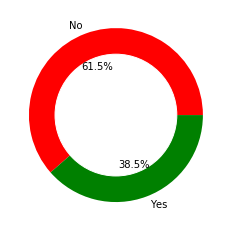

In [32]:
#Pie Chart Visualisation
Converted = leads['Converted'].value_counts().to_frame('counts')
my_circle = plt.Circle((0,0),0.7,color='white')
plt.pie(Converted.counts,labels=['No','Yes'],colors=['red','green'],autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

***Data looks balanced as converted rate for the dataset turns out to be 38.54%***

In [33]:
#All columns
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### *Univariate and Bivariate Analysis*

#### *1.Countplot on 'Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'*

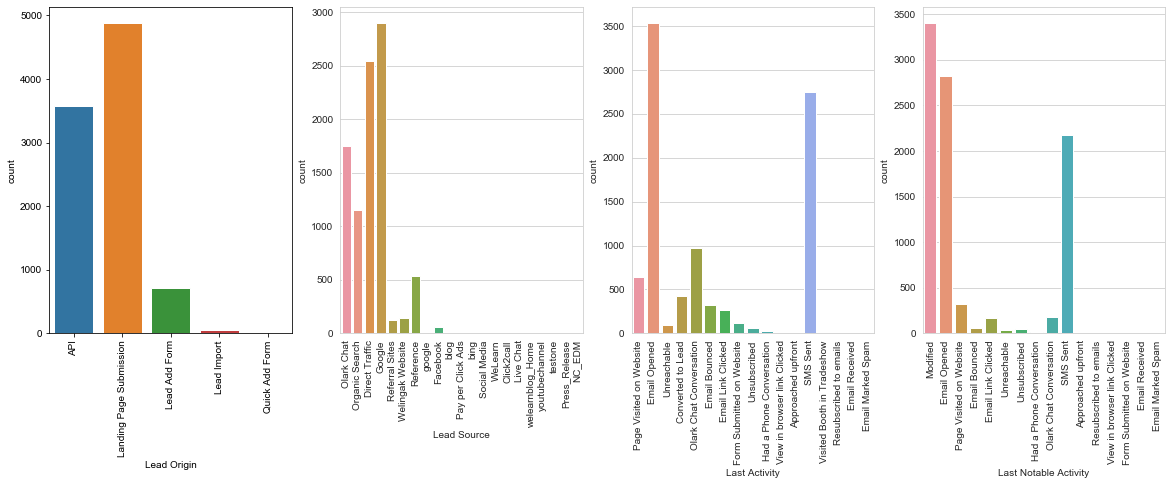

In [34]:
#Countplot on 'Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.set_style("whitegrid")
sns.countplot(x='Lead Origin' ,data=leads)
plt.xticks(rotation=90)

plt.subplot(1,4,2)
sns.set_style("whitegrid")
sns.countplot(x='Lead Source' ,data=leads)
plt.xticks(rotation=90)

plt.subplot(1,4,3)
sns.set_style("whitegrid")
sns.countplot(x='Last Activity' ,data=leads)
plt.xticks(rotation=90)

plt.subplot(1,4,4)
sns.set_style("whitegrid")
sns.countplot(x='Last Notable Activity' ,data=leads)
plt.xticks(rotation=90)

plt.show()

***Insights:<br>1. 'Landing Page Submission' and 'API' are the 2 most common Lead Origins<br>2. 'Google', 'Olark Chat' and 'Direct Traffic' are the leading source for Lead<br>3. Mostly last Activity done by customer would be 'Email Opened' and 'SMS sent' whereas Last notable activity is 'Modified' along with 'Email opened' and 'SMS sent'***

In [35]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                         'Visited Booth in Tradeshow', 'Approached upfront',
                                                         'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                        'Other Activity')

# Let's keep considerable Lead Source as such and club all others to "Other Sources"
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
                                                     'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home',
                                                     'youtubechannel'], 'Other Sources')

# Let's keep considerable last Notable activities as such and club all others to "Other_Activity"
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation', 
                                                                         'View in browser link Clicked', 
                                                                         'Form Submitted on Website''Approached upfront',
                                                                         'Resubscribed to emails','Email Received',
                                                                         'Email Marked Spam'], 'Other Activity')

# Let's keep considerable Lead Origin as such and club all others to "Other_Activity"
leads['Lead Origin'] = leads['Lead Origin'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                     'Form Submitted on Website''Approached upfront',
                                                     'Resubscribed to emails','Email Received', 'Email Marked Spam'], 
                                                    'Other Activity')

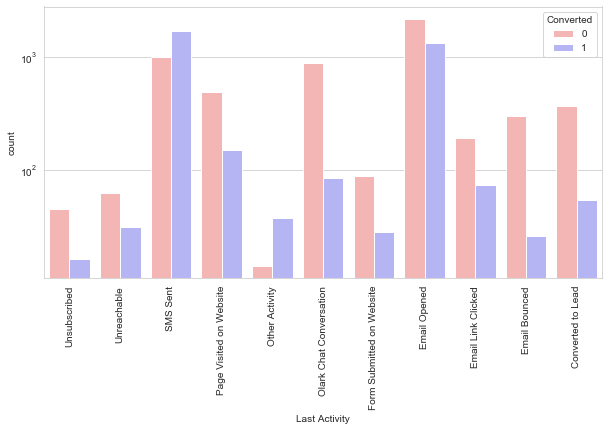

In [36]:
#Last Activity vs Converted
plt.figure(figsize = (10,5))
a=leads.sort_values('Last Activity',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = "Last Activity", hue = "Converted", data = a, palette='bwr_r')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

***Insights : Costumers with SMS sent has last activity had more conversion then any other activity.***

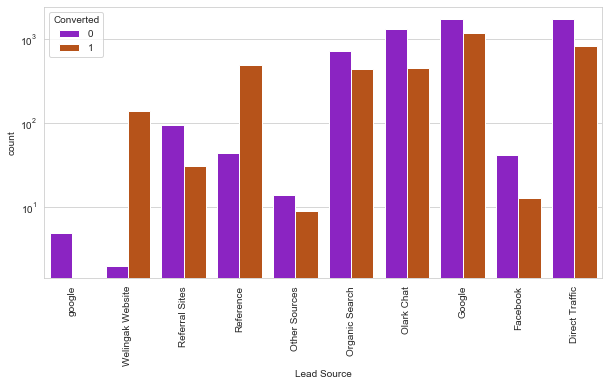

In [37]:
#Lead Source vs Converted
plt.figure(figsize = (10,5))
a=leads.sort_values('Lead Source',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = "Lead Source", hue = "Converted", data = a, palette='gnuplot')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

***Insights : Customers from Lead source 'Wellingak Website' and 'Reference' are more likely to convert.***

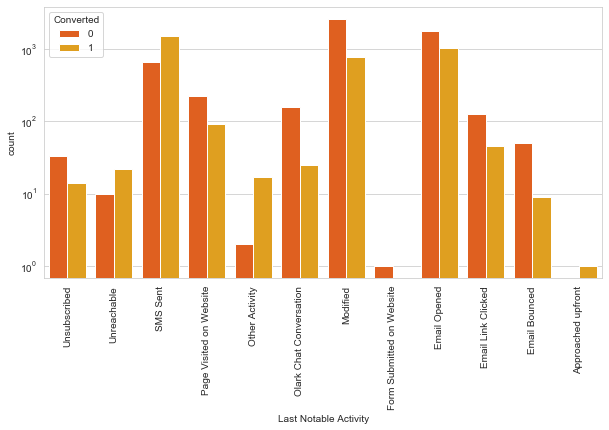

In [38]:
#Last Notable Activity vs Converted
plt.figure(figsize = (10,5))
a=leads.sort_values('Last Notable Activity',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = a, palette='autumn')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

***Insights : Costumers with SMS sent, Unreachable and 'Other Activity' has last Notable activity had more conversion from rest on the activities.***

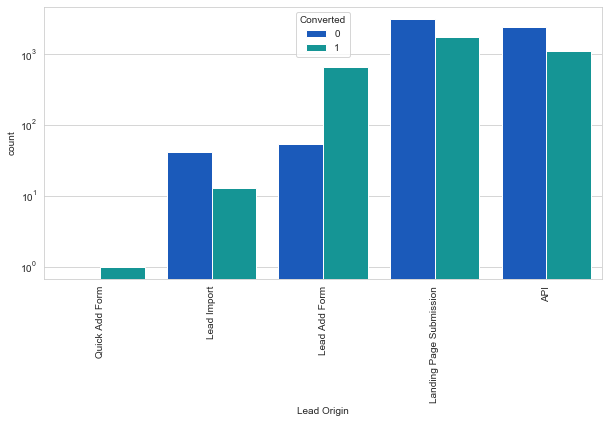

In [39]:
#Lead Origin Activity vs Converted
plt.figure(figsize = (10,5))
a=leads.sort_values('Lead Origin',ascending=False)
sns.set_style("whitegrid")
sns.countplot(x = 'Lead Origin', hue = "Converted", data = a, palette='winter')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.show()

***Insights : Customers from Lead Origin 'Lead Add Form' are more likely to convert.***

#### *2.Analysis on Columns with 02 Unique Values( YES or NO)*

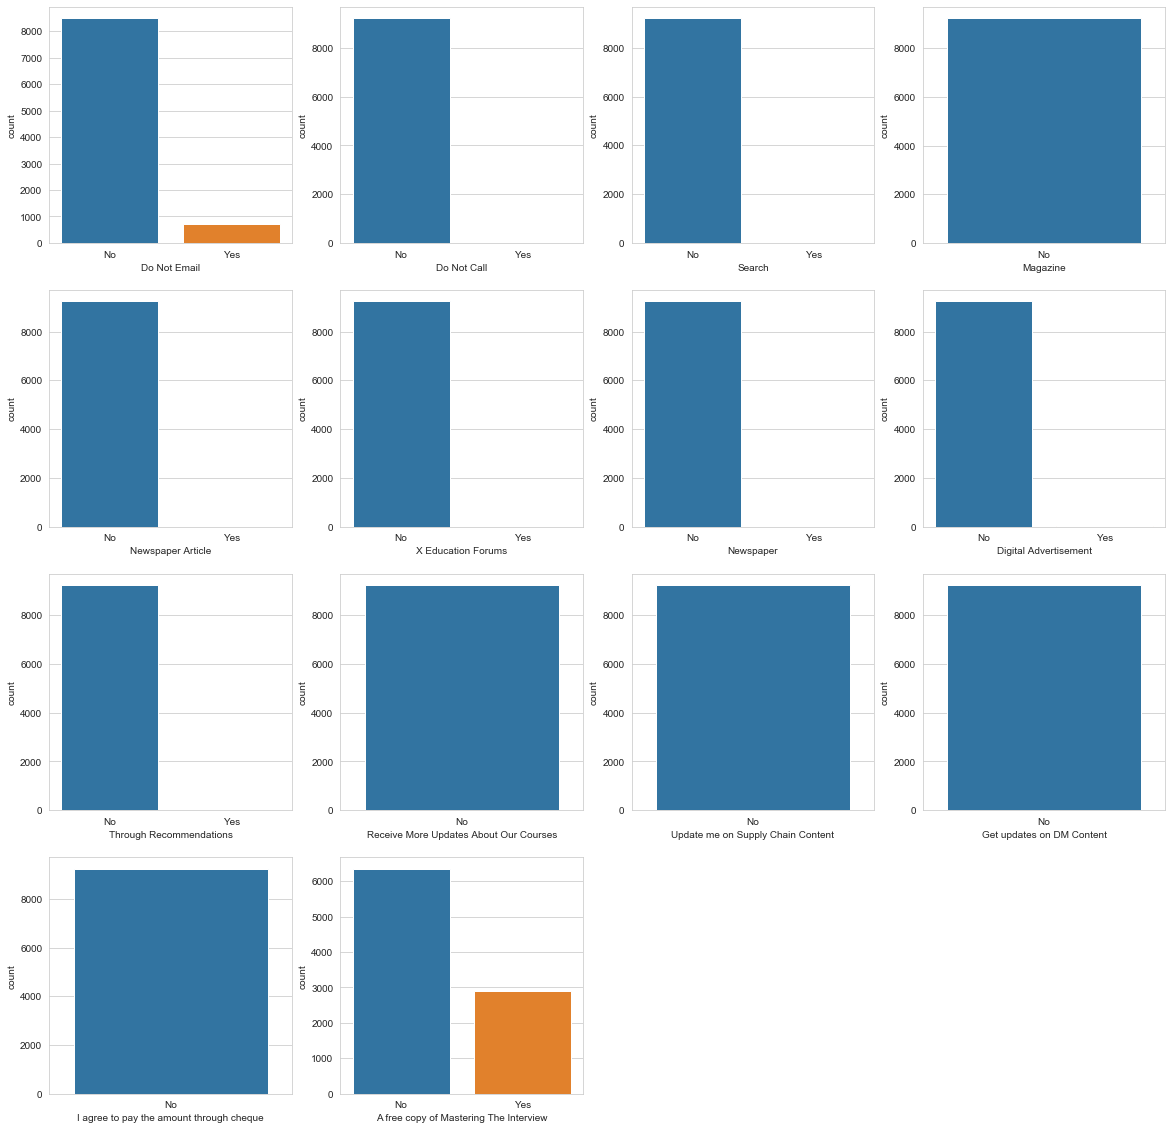

In [40]:
columns=['Do Not Email', 'Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
         'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
         'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque',
         'A free copy of Mastering The Interview']

#Countplot on above Columns
plt.figure(figsize=(20,20))
for i in range(0,len(columns)):
    plt.subplot(4,4,i+1)
    sns.set_style("whitegrid")
    sns.countplot(x = columns[i], data=leads)
    
plt.show()   

In [41]:
leads['Digital Advertisement'].value_counts(normalize=True)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

***Columns like 'Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper', 'Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque' and 'Digital Advertisement' have skewed values and add no value to the dataset hence these data will be removed***

In [42]:
leads.drop(['Do Not Call','Search', 'Magazine','Newspaper Article', 'X Education Forums', 'Newspaper',
            'Through Recommendations','Receive More Updates About Our Courses','Digital Advertisement',
            'Update me on Supply Chain Content', 'Get updates on DM Content','I agree to pay the amount through cheque'],
           1, inplace = True)

In [43]:
leads.shape

(9240, 10)

In [44]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,No,Modified


***Total 27 Columns removed from original Dataset which do not add any value to our Case study***

#### *3.Analysis on Numeric Columns*

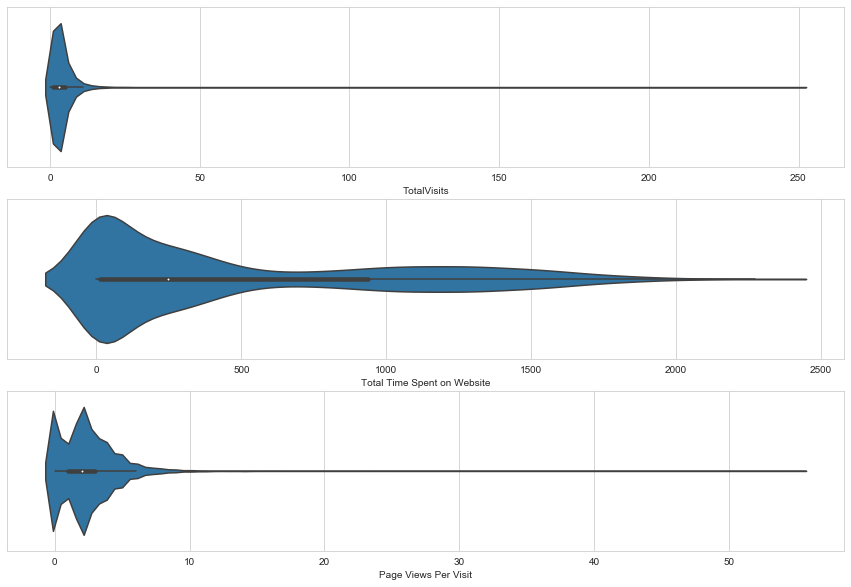

In [45]:
#Violin plot on Original attributes to visualize the spread of the data
plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sns.violinplot( x = 'TotalVisits', data = leads)
plt.subplot(3,1,2)
sns.violinplot( x = 'Total Time Spent on Website', data = leads)
plt.subplot(3,1,3)
sns.violinplot( x = 'Page Views Per Visit', data=leads)
plt.show()

***Insights:<br>1.We can see that most of them spend 0 to 500 minutes on website.<br>2.Page view per visit is mostly between 0 to 8 and total visit will also be on the lower side.***

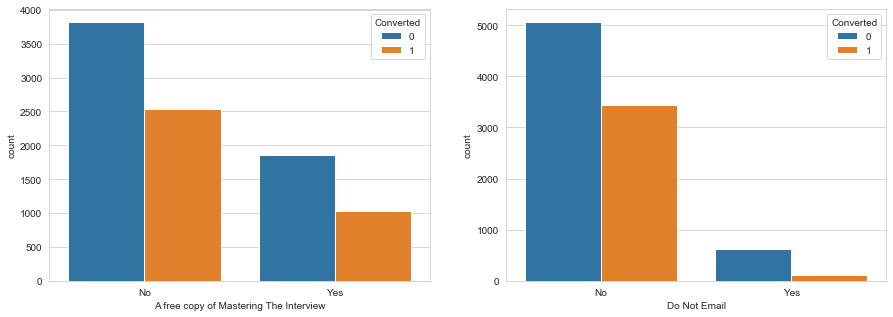

In [46]:
#Countplot on 'A free copy of Mastering The Interview' and 'Do Not Email' vs 'Converted'
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot( x = 'A free copy of Mastering The Interview',   hue='Converted', data = leads)
plt.subplot(1,2,2)
sns.countplot( x= 'Do Not Email',hue='Converted', data = leads)

plt.show()

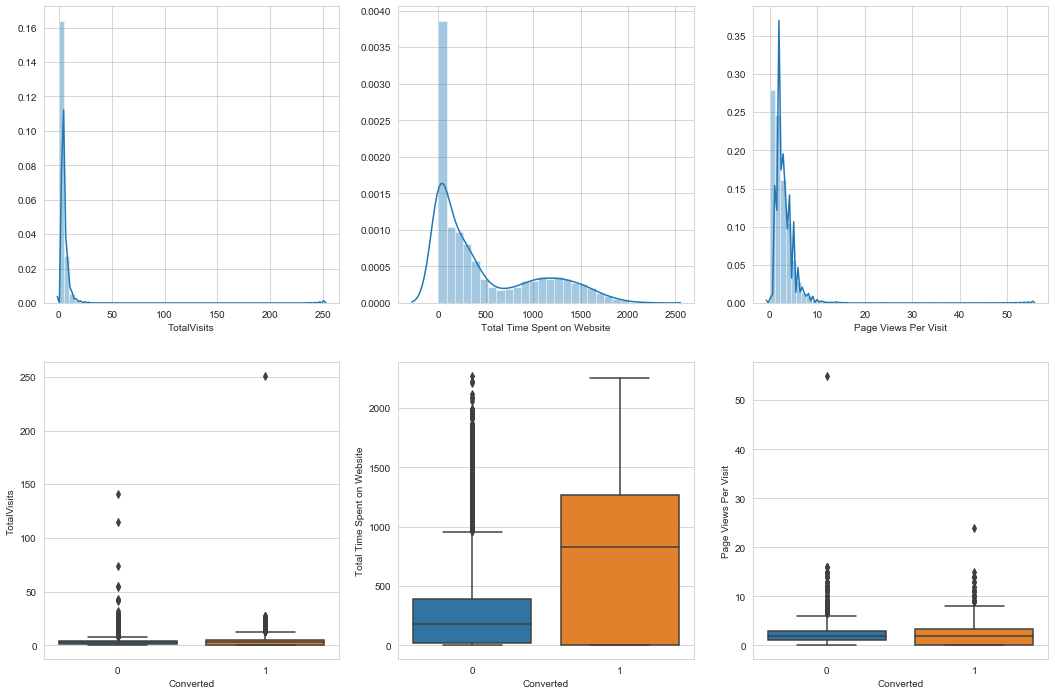

In [47]:
#Identification of outliers in Numerical Cols
numerical_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(18,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.distplot(leads[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=leads[col], x = leads['Converted'])
    i+=1

plt.show()   

***Insight :<br>1. The numerical columns are right skewed and have some outliers which need to be treated.<br>2. From the above boxplot we have infer that People who spend more time on Website and more likely to join the course.<br>3. Apart from that we cannot draw much inference from the above Boxplot. We can also see lot of outleirs in the dataset***

#### *4. Outlier Treatment*

In [48]:
# Finding quantile3 and capping the upper outliers

Q3 = leads['TotalVisits'].quantile(0.95)
leads['TotalVisits'][leads['TotalVisits']>=Q3]=Q3

Q3 = leads['Total Time Spent on Website'].quantile(0.95)
leads['Total Time Spent on Website'][leads['Total Time Spent on Website']>=Q3]=Q3

Q3 = leads['Page Views Per Visit'].quantile(0.95)
leads['Page Views Per Visit'][leads['Page Views Per Visit']>=Q3]=Q3

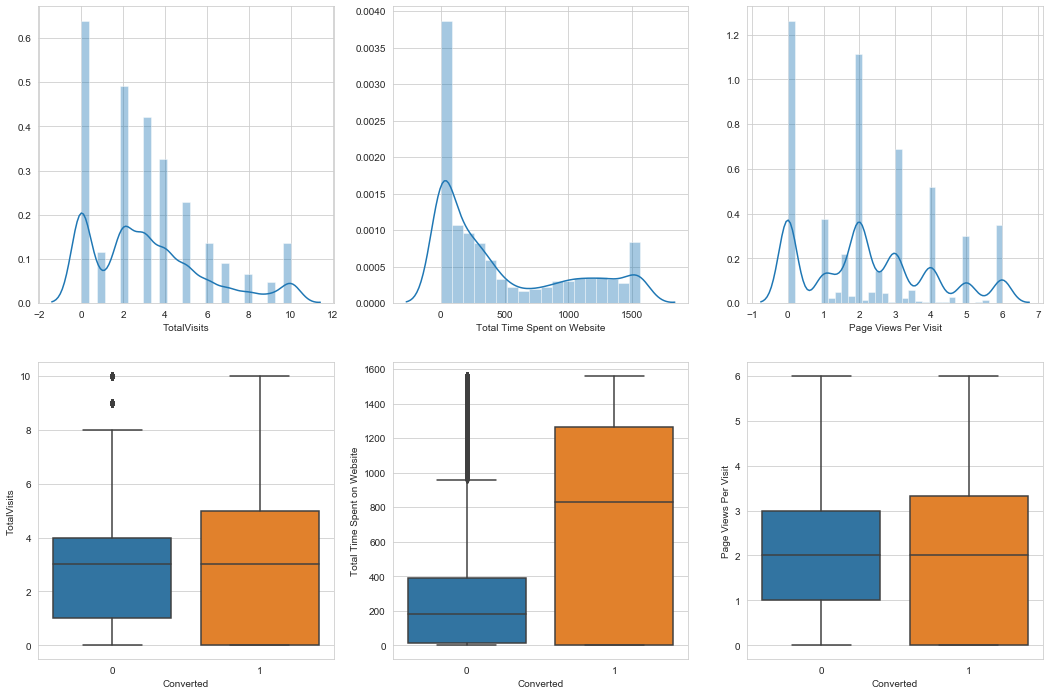

In [49]:
#Visualising after removing outlier
plt.figure(figsize=(18,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.set_style("whitegrid")
    sns.distplot(leads[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=leads[col], x = leads['Converted'])
    i+=1

plt.show() 

In [50]:
#Replace Yes and No to 1 and 0
columns=['Do Not Email',
       'A free copy of Mastering The Interview']

leads[columns] = leads[columns].replace('Yes',1)
leads[columns] = leads[columns].replace('No',0)

#### *5. Visualisation using Heatmap*

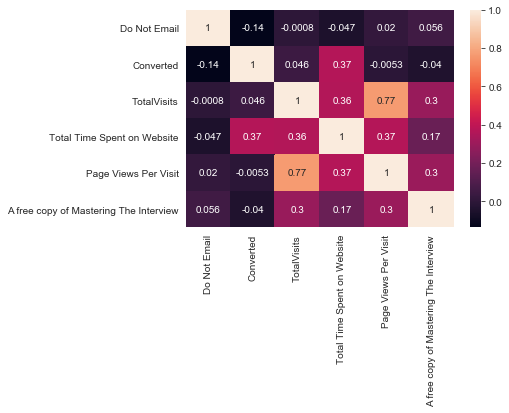

In [51]:
#Heatmap
sns.heatmap(leads.corr(),annot=True)

#### *6. Visualasation Using Pairplot*

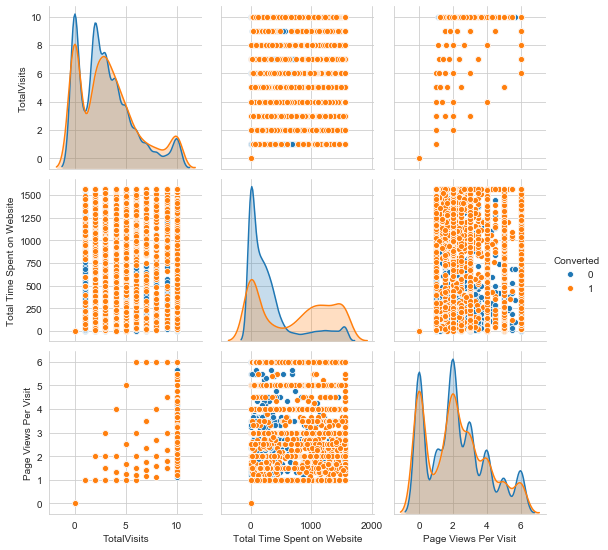

In [52]:
#Pairplot
lead_num = leads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(lead_num,diag_kind='kde',hue='Converted')
plt.show()

## *Dummy Variable Creation*

***To deal with categorical variables, we need to convert these levels into integer as well.<br>
For this, we will use something called dummy variables and we will use drop_first=True, because for ex- if we are creating 3 dummy columns for 4 levels, then for the level where all three dummy value will be 0, then automatically that means it belongs to 4th level, so we don't need to keep that.***

In [53]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,Modified,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,Email Opened,...,0,1,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,1,Email Opened,...,0,1,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,Modified,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,0,Modified,...,0,0,0,1,0,0,0,0,0,0


In [54]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis=1)
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [55]:
leads.columns

Index(['Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Bounced',
       'Las

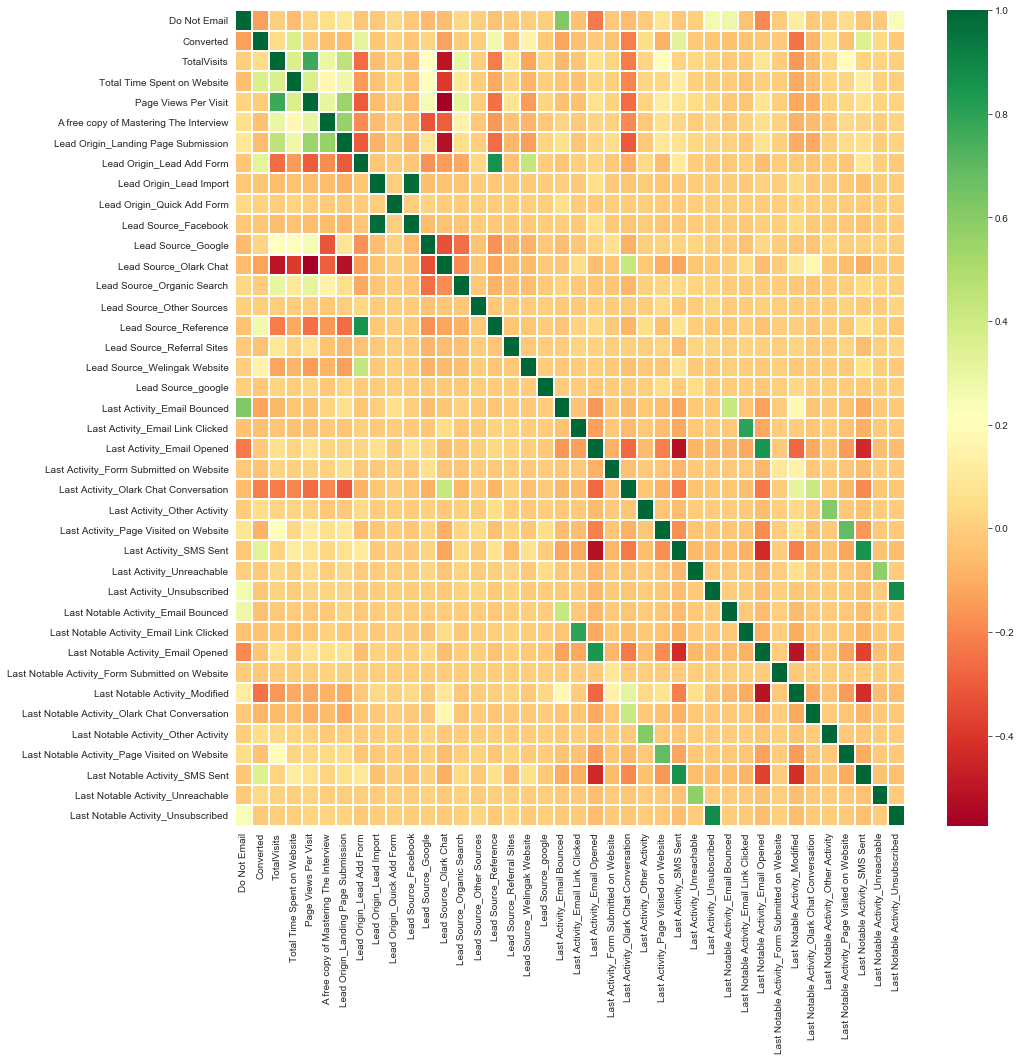

In [56]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(leads.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [57]:
#Correlation
corr_lead = leads.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
408,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
1588,Last Notable Activity_Unsubscribed,Last Activity_Unsubscribed,0.877108
607,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
1506,Last Notable Activity_SMS Sent,Last Activity_SMS Sent,0.852707
1261,Last Notable Activity_Email Opened,Last Activity_Email Opened,0.842496


In [58]:
# Bottom 5 correlated variables
corr_df.tail(5)

,VAR1,VAR2,Correlation
482,Lead Source_Olark Chat,TotalVisits,-0.500094
1351,Last Notable Activity_Modified,Last Notable Activity_Email Opened,-0.507426
1061,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325
486,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
484,Lead Source_Olark Chat,Page Views Per Visit,-0.573334


## *Train & Test Split*

***Basic step to perform regression is to split into train data and test data.We will use 70% of data as Train Dataset and Rest Test Dataset***

In [59]:
# Target variable
Y = leads['Converted']
X = leads.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [60]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 39)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 39)
 Shape of y_test is  :  (2772,)


## *Data Scaling*

***Now the numeric variables present in the dataset  have different scales.So let's go ahead and scale these variables.
It is extremely important to rescale the numerical-variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:<br>1. Min-Max scaling <br>2. Standardisation (mean-0, sigma-1)<br><br>Here, we will use MinMax scaling.***

In [61]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,-1.149699,-0.901052,-1.266675,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.021396,-0.516439,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3516,0,0.662077,-0.700273,0.143543,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8105,0,0.662077,1.428746,1.553761,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.901052,-1.266675,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# *Model Building*

***Before model building we need to select some feature that will best describe our model. We will do this process of selection using RFE.***

## *Recursive Feature Elimination(RFE)*

***Identify the top significant features using RFE ( Recursive Feature Elimination) - automated approach to know which variables/features are contributing more to the target variable.***

In [62]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

In [63]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('A free copy of Mastering The Interview', False, 17),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('Lead Origin_Quick Add Form', True, 1),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other Sources', False, 3),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 19),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_google', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 11),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity

In [64]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Quick Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Source_google',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other Activity',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Bounced', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other Activity',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [65]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

***Now let's use p-values and VIFs to create a logistic regression model.***

## *Manual Feature Reduction*

In [66]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

### *Model -1*

In [67]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2832.9
Date:                Sat, 28 Nov 2020   Deviance:                       5665.8
Time:                        10:57:33   Pearson chi2:                 6.48e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5659      0.114    -13.704      0.000      -1.790      -1.342
Do Not Email                                     -1.1892      0.205     -5.799      0.000      -1.591      -0.787
Total Time Spent on Website                       1.1334      0.038     29.539      0.000       1.058       1.209
Lead Origin_Lead Add Form                         3.1476      0.493      6.379      0.000       2.180       4.115
Lead Origin_Quick Add Form                       24.1880   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead Source_Olark Chat                            1.1347      0.100     11.380      0.000       0.939       1.330
Lead Source_Reference                             0.9341      0.525      1.781      0.075      -0.094       1.962
Lead Source_Welingak Website                      2.3695      0.872      2.718      0.007       0.661       4.078
Lead Source_google                              -20.8667   1.98e+04     -0.001      0.999   -3.87e+04    3.87e+04
Last Activity_Email Bounced                      -0.7213      0.445     -1.623      0.105      -1.593       0.150
Last Activity_Email Opened                        0.5025      0.114      4.401      0.000       0.279       0.726
Last Activity_Olark Chat Conversation            -0.6672      0.202     -3.303      0.001      -1.063      -0.271
Last Activity_Other Activity                      1.6737      0.565      2.960      0.003       0.565       2.782
Last Activity_SMS Sent                            0.9322      0.161      5.802      0.000       0.617       1.247
Last Activity_Unsubscribed                        1.1060      0.473      2.339      0.019       0.179       2.033
Last Notable Activity_Email Bounced               1.3563      0.612      2.216      0.027       0.157       2.556
Last Notable Activity_Modified                   -0.4776      0.108     -4.423      0.000      -0.689      -0.266
Last Notable Activity_Olark Chat Conversation    -0.2449      0.367     -0.668      0.504      -0.964       0.474
Last Notable Activity_Other Activity              2.3803      1.209      1.968      0.049       0.010       4.751
Last Notable Activity_SMS Sent                    0.8848      0.177      4.995      0.000       0.538       1.232
Last Notable Activity_Unreachable                 2.1042      0.513      4.103      0.000       1.099       3.109
=================================================================================================================
"""

In [68]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Lead Add Form,15.86
5,Lead Source_Reference,12.91
12,Last Activity_SMS Sent,6.58
18,Last Notable Activity_SMS Sent,6.21
6,Lead Source_Welingak Website,3.78
8,Last Activity_Email Bounced,2.20
15,Last Notable Activity_Modified,2.20
10,Last Activity_Olark Chat Conversation,2.17
0,Do Not Email,2.05
4,Lead Source_Olark Chat,1.76


***There are some variables with p-values > 0.05. These variables are insignificant.***

### *Model -2*

In [69]:
#Removing Lead Origin_Quick Add Form p-value=1.000
features.remove('Lead Origin_Quick Add Form') 
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2834.7
Date:                Sat, 28 Nov 2020   Deviance:                       5669.3
Time:                        10:57:33   Pearson chi2:                 6.47e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5666      0.114    -13.709      0.000      -1.791      -1.343
Do Not Email                                     -1.1841      0.205     -5.783      0.000      -1.585      -0.783
Total Time Spent on Website                       1.1347      0.038     29.573      0.000       1.059       1.210
Lead Origin_Lead Add Form                         3.1269      0.490      6.379      0.000       2.166       4.088
Lead Source_Olark Chat                            1.1353      0.100     11.387      0.000       0.940       1.331
Lead Source_Reference                             0.9528      0.522      1.827      0.068      -0.069       1.975
Lead Source_Welingak Website                      2.3910      0.870      2.748      0.006       0.686       4.096
Lead Source_google                              -19.8670    1.2e+04     -0.002      0.999   -2.35e+04    2.35e+04
Last Activity_Email Bounced                      -0.6002      0.428     -1.403      0.161      -1.438       0.238
Last Activity_Email Opened                        0.5031      0.114      4.405      0.000       0.279       0.727
Last Activity_Olark Chat Conversation            -0.6664      0.202     -3.299      0.001      -1.062      -0.271
Last Activity_Other Activity                      1.6739      0.566      2.960      0.003       0.565       2.782
Last Activity_SMS Sent                            0.9324      0.161      5.802      0.000       0.617       1.247
Last Activity_Unsubscribed                        1.1034      0.473      2.334      0.020       0.177       2.030
Last Notable Activity_Email Bounced               1.2298      0.599      2.051      0.040       0.055       2.405
Last Notable Activity_Modified                   -0.4776      0.108     -4.422      0.000      -0.689      -0.266
Last Notable Activity_Olark Chat Conversation    -0.2453      0.367     -0.668      0.504      -0.964       0.474
Last Notable Activity_Other Activity              2.3810      1.209      1.969      0.049       0.010       4.751
Last Notable Activity_SMS Sent                    0.8851      0.177      4.997      0.000       0.538       1.232
Last Notable Activity_Unreachable                 2.1052      0.513      4.105      0.000       1.100       3.110
=================================================================================================================
"""

In [70]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Lead Add Form,15.85
4,Lead Source_Reference,12.91
11,Last Activity_SMS Sent,6.58
17,Last Notable Activity_SMS Sent,6.21
5,Lead Source_Welingak Website,3.78
14,Last Notable Activity_Modified,2.20
7,Last Activity_Email Bounced,2.20
9,Last Activity_Olark Chat Conversation,2.17
0,Do Not Email,2.05
3,Lead Source_Olark Chat,1.76


### *Model -3*

In [71]:
#Removing Lead Source_google Add Form p-value=0.999
features.remove('Lead Source_google') 
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.6
Date:                Sat, 28 Nov 2020   Deviance:                       5671.2
Time:                        10:57:34   Pearson chi2:                 6.48e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5707      0.114    -13.741      0.000      -1.795      -1.347
Do Not Email                                     -1.1854      0.205     -5.792      0.000      -1.587      -0.784
Total Time Spent on Website                       1.1346      0.038     29.571      0.000       1.059       1.210
Lead Origin_Lead Add Form                         3.1276      0.490      6.380      0.000       2.167       4.088
Lead Source_Olark Chat                            1.1359      0.100     11.392      0.000       0.941       1.331
Lead Source_Reference                             0.9535      0.522      1.828      0.068      -0.069       1.976
Lead Source_Welingak Website                      2.3915      0.870      2.749      0.006       0.686       4.097
Last Activity_Email Bounced                      -0.5918      0.428     -1.383      0.167      -1.430       0.247
Last Activity_Email Opened                        0.5075      0.114      4.444      0.000       0.284       0.731
Last Activity_Olark Chat Conversation            -0.6594      0.202     -3.265      0.001      -1.055      -0.264
Last Activity_Other Activity                      1.6812      0.566      2.973      0.003       0.573       2.790
Last Activity_SMS Sent                            0.9388      0.161      5.846      0.000       0.624       1.254
Last Activity_Unsubscribed                        1.1092      0.473      2.346      0.019       0.183       2.036
Last Notable Activity_Email Bounced               1.2268      0.600      2.046      0.041       0.052       2.402
Last Notable Activity_Modified                   -0.4810      0.108     -4.453      0.000      -0.693      -0.269
Last Notable Activity_Olark Chat Conversation    -0.2487      0.367     -0.678      0.498      -0.968       0.470
Last Notable Activity_Other Activity              2.3777      1.209      1.966      0.049       0.007       4.748
Last Notable Activity_SMS Sent                    0.8827      0.177      4.984      0.000       0.536       1.230
Last Notable Activity_Unreachable                 2.1092      0.513      4.112      0.000       1.104       3.114
=================================================================================================================
"""

In [72]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Lead Add Form,15.85
4,Lead Source_Reference,12.91
10,Last Activity_SMS Sent,6.58
16,Last Notable Activity_SMS Sent,6.21
5,Lead Source_Welingak Website,3.78
6,Last Activity_Email Bounced,2.19
13,Last Notable Activity_Modified,2.19
8,Last Activity_Olark Chat Conversation,2.17
0,Do Not Email,2.05
3,Lead Source_Olark Chat,1.76


### *Model -4*

In [73]:
#Removing Last Notable Activity_Other Activity p-value=0.230
features.remove('Last Notable Activity_Other Activity') 
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2838.1
Date:                Sat, 28 Nov 2020   Deviance:                       5676.3
Time:                        10:57:34   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5532      0.114    -13.637      0.000      -1.776      -1.330
Do Not Email                                     -1.1862      0.204     -5.812      0.000      -1.586      -0.786
Total Time Spent on Website                       1.1335      0.038     29.563      0.000       1.058       1.209
Lead Origin_Lead Add Form                         3.1278      0.490      6.381      0.000       2.167       4.089
Lead Source_Olark Chat                            1.1325      0.100     11.368      0.000       0.937       1.328
Lead Source_Reference                             0.9507      0.522      1.823      0.068      -0.072       1.973
Lead Source_Welingak Website                      2.3903      0.870      2.748      0.006       0.685       4.095
Last Activity_Email Bounced                      -0.5801      0.427     -1.357      0.175      -1.418       0.258
Last Activity_Email Opened                        0.4956      0.114      4.346      0.000       0.272       0.719
Last Activity_Olark Chat Conversation            -0.6478      0.202     -3.208      0.001      -1.044      -0.252
Last Activity_Other Activity                      2.4643      0.457      5.388      0.000       1.568       3.361
Last Activity_SMS Sent                            0.9494      0.161      5.912      0.000       0.635       1.264
Last Activity_Unsubscribed                        1.0982      0.472      2.325      0.020       0.172       2.024
Last Notable Activity_Email Bounced               1.1995      0.599      2.002      0.045       0.025       2.374
Last Notable Activity_Modified                   -0.5082      0.107     -4.730      0.000      -0.719      -0.298
Last Notable Activity_Olark Chat Conversation    -0.2754      0.367     -0.751      0.453      -0.994       0.443
Last Notable Activity_SMS Sent                    0.8553      0.177      4.840      0.000       0.509       1.202
Last Notable Activity_Unreachable                 2.0917      0.513      4.080      0.000       1.087       3.097
=================================================================================================================
"""

In [74]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Lead Add Form,15.85
4,Lead Source_Reference,12.91
10,Last Activity_SMS Sent,6.56
15,Last Notable Activity_SMS Sent,6.20
5,Lead Source_Welingak Website,3.78
6,Last Activity_Email Bounced,2.19
8,Last Activity_Olark Chat Conversation,2.17
13,Last Notable Activity_Modified,2.17
0,Do Not Email,2.05
3,Lead Source_Olark Chat,1.76


### *Model -5*

In [75]:
#Last Activity_Email Bounced p-value =0.184
features.remove('Last Activity_Email Bounced') 
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2839.1
Date:                Sat, 28 Nov 2020   Deviance:                       5678.3
Time:                        10:57:34   Pearson chi2:                 6.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5666      0.114    -13.753      0.000      -1.790      -1.343
Do Not Email                                     -1.3099      0.186     -7.056      0.000      -1.674      -0.946
Total Time Spent on Website                       1.1326      0.038     29.537      0.000       1.057       1.208
Lead Origin_Lead Add Form                         3.0707      0.479      6.404      0.000       2.131       4.010
Lead Source_Olark Chat                            1.1294      0.100     11.339      0.000       0.934       1.325
Lead Source_Reference                             1.0039      0.512      1.961      0.050       0.001       2.007
Lead Source_Welingak Website                      2.4607      0.864      2.849      0.004       0.768       4.153
Last Activity_Email Opened                        0.5129      0.114      4.509      0.000       0.290       0.736
Last Activity_Olark Chat Conversation            -0.6146      0.201     -3.061      0.002      -1.008      -0.221
Last Activity_Other Activity                      2.4937      0.457      5.451      0.000       1.597       3.390
Last Activity_SMS Sent                            0.9887      0.158      6.240      0.000       0.678       1.299
Last Activity_Unsubscribed                        1.2354      0.462      2.674      0.007       0.330       2.141
Last Notable Activity_Email Bounced               0.7572      0.494      1.534      0.125      -0.210       1.725
Last Notable Activity_Modified                   -0.5248      0.107     -4.904      0.000      -0.735      -0.315
Last Notable Activity_Olark Chat Conversation    -0.2914      0.367     -0.795      0.427      -1.010       0.427
Last Notable Activity_SMS Sent                    0.8372      0.176      4.745      0.000       0.491       1.183
Last Notable Activity_Unreachable                 2.1093      0.513      4.109      0.000       1.103       3.116
=================================================================================================================
"""

In [76]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Lead Add Form,15.85
4,Lead Source_Reference,12.91
9,Last Activity_SMS Sent,6.31
14,Last Notable Activity_SMS Sent,6.08
5,Lead Source_Welingak Website,3.78
7,Last Activity_Olark Chat Conversation,2.10
12,Last Notable Activity_Modified,2.04
3,Lead Source_Olark Chat,1.76
0,Do Not Email,1.33
13,Last Notable Activity_Olark Chat Conversation,1.33


### *Model -6*

In [77]:
#Lead Origin_Lead Add Form VIF=15.81
features.remove('Lead Origin_Lead Add Form') 
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.3
Date:                Sat, 28 Nov 2020   Deviance:                       5732.6
Time:                        10:57:35   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5498      0.113    -13.711      0.000      -1.771      -1.328
Do Not Email                                     -1.2159      0.182     -6.699      0.000      -1.572      -0.860
Total Time Spent on Website                       1.1074      0.038     29.253      0.000       1.033       1.182
Lead Source_Olark Chat                            1.0826      0.099     10.967      0.000       0.889       1.276
Lead Source_Reference                             4.0182      0.198     20.293      0.000       3.630       4.406
Lead Source_Welingak Website                      5.4692      0.724      7.558      0.000       4.051       6.888
Last Activity_Email Opened                        0.5177      0.113      4.583      0.000       0.296       0.739
Last Activity_Olark Chat Conversation            -0.6271      0.200     -3.135      0.002      -1.019      -0.235
Last Activity_Other Activity                      2.4684      0.455      5.426      0.000       1.577       3.360
Last Activity_SMS Sent                            0.9835      0.157      6.254      0.000       0.675       1.292
Last Activity_Unsubscribed                        1.3388      0.456      2.934      0.003       0.444       2.233
Last Notable Activity_Email Bounced               0.6685      0.491      1.363      0.173      -0.293       1.630
Last Notable Activity_Modified                   -0.5071      0.106     -4.772      0.000      -0.715      -0.299
Last Notable Activity_Olark Chat Conversation    -0.2647      0.365     -0.725      0.468      -0.980       0.451
Last Notable Activity_SMS Sent                    0.8700      0.175      4.961      0.000       0.526       1.214
Last Notable Activity_Unreachable                 2.0868      0.511      4.081      0.000       1.085       3.089
=================================================================================================================
"""

In [78]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
8,Last Activity_SMS Sent,6.31
13,Last Notable Activity_SMS Sent,6.08
6,Last Activity_Olark Chat Conversation,2.10
11,Last Notable Activity_Modified,2.04
2,Lead Source_Olark Chat,1.76
0,Do Not Email,1.33
12,Last Notable Activity_Olark Chat Conversation,1.33
1,Total Time Spent on Website,1.25
5,Last Activity_Email Opened,1.22
3,Lead Source_Reference,1.15


### *Model -7*

In [79]:
#Last Activity_Email Opened VIF=7.57
features.remove('Last Activity_Email Opened') 
log_model7, X_train_sm7 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.0
Date:                Sat, 28 Nov 2020   Deviance:                       5754.1
Time:                        10:57:35   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1071      0.056    -19.743      0.000      -1.217      -0.997
Do Not Email                                     -1.3329      0.178     -7.487      0.000      -1.682      -0.984
Total Time Spent on Website                       1.1078      0.038     29.363      0.000       1.034       1.182
Lead Source_Olark Chat                            1.1017      0.099     11.145      0.000       0.908       1.295
Lead Source_Reference                             4.0766      0.198     20.590      0.000       3.689       4.465
Lead Source_Welingak Website                      5.5085      0.723      7.614      0.000       4.091       6.926
Last Activity_Olark Chat Conversation            -0.8644      0.192     -4.491      0.000      -1.242      -0.487
Last Activity_Other Activity                      2.1534      0.452      4.767      0.000       1.268       3.039
Last Activity_SMS Sent                            0.7597      0.148      5.119      0.000       0.469       1.051
Last Activity_Unsubscribed                        1.0412      0.450      2.314      0.021       0.159       1.923
Last Notable Activity_Email Bounced               0.3401      0.484      0.702      0.483      -0.609       1.290
Last Notable Activity_Modified                   -0.7246      0.095     -7.599      0.000      -0.911      -0.538
Last Notable Activity_Olark Chat Conversation    -0.4834      0.362     -1.335      0.182      -1.193       0.226
Last Notable Activity_SMS Sent                    0.6531      0.169      3.862      0.000       0.322       0.985
Last Notable Activity_Unreachable                 1.6455      0.503      3.273      0.001       0.660       2.631
=================================================================================================================
"""

In [80]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
7,Last Activity_SMS Sent,6.18
12,Last Notable Activity_SMS Sent,6.03
5,Last Activity_Olark Chat Conversation,1.99
10,Last Notable Activity_Modified,1.95
2,Lead Source_Olark Chat,1.59
11,Last Notable Activity_Olark Chat Conversation,1.33
0,Do Not Email,1.32
1,Total Time Spent on Website,1.22
3,Lead Source_Reference,1.11
9,Last Notable Activity_Email Bounced,1.11


### *Model -8*

In [81]:
#Last Notable Activity_Unreachable p-value=0.067
features.remove('Last Notable Activity_Unreachable') 
log_model8, X_train_sm8 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2882.3
Date:                Sat, 28 Nov 2020   Deviance:                       5764.7
Time:                        10:57:35   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0889      0.056    -19.568      0.000      -1.198      -0.980
Do Not Email                                     -1.3308      0.178     -7.475      0.000      -1.680      -0.982
Total Time Spent on Website                       1.1042      0.038     29.336      0.000       1.030       1.178
Lead Source_Olark Chat                            1.0940      0.099     11.088      0.000       0.901       1.287
Lead Source_Reference                             4.0694      0.198     20.565      0.000       3.682       4.457
Lead Source_Welingak Website                      5.4978      0.723      7.600      0.000       4.080       6.916
Last Activity_Olark Chat Conversation            -0.8634      0.192     -4.487      0.000      -1.241      -0.486
Last Activity_Other Activity                      2.1451      0.452      4.751      0.000       1.260       3.030
Last Activity_SMS Sent                            0.7590      0.148      5.118      0.000       0.468       1.050
Last Activity_Unsubscribed                        1.0261      0.450      2.282      0.023       0.145       1.907
Last Notable Activity_Email Bounced               0.3232      0.484      0.667      0.505      -0.626       1.272
Last Notable Activity_Modified                   -0.7398      0.095     -7.776      0.000      -0.926      -0.553
Last Notable Activity_Olark Chat Conversation    -0.4973      0.362     -1.374      0.169      -1.207       0.212
Last Notable Activity_SMS Sent                    0.6369      0.169      3.771      0.000       0.306       0.968
=================================================================================================================
"""

In [82]:
#Checking VIF values
calculate_VIF(X_train[features])

,Features,VIF
7,Last Activity_SMS Sent,6.18
12,Last Notable Activity_SMS Sent,6.03
5,Last Activity_Olark Chat Conversation,1.99
10,Last Notable Activity_Modified,1.95
2,Lead Source_Olark Chat,1.59
11,Last Notable Activity_Olark Chat Conversation,1.33
0,Do Not Email,1.32
1,Total Time Spent on Website,1.22
3,Lead Source_Reference,1.11
9,Last Notable Activity_Email Bounced,1.11


In [83]:
# How many features in the model ?
len(features)

13

***Now, since all the p-values are less than 0.05 and vif are less than 5, we can proceed with our model evaluation.***

# *Model Evalution : Train Dataset*

## *Prediction on y_train(Predicted Probability Calculation)*

In [84]:
# Getting the predicted values on the train set
y_train_pred = log_model8.predict(X_train_sm8)
y_train_pred[:10]

1871    0.270937
6795    0.256296
3516    0.316873
8105    0.868134
3934    0.150628
4844    0.920812
3297    0.129424
8071    0.983763
987     0.246173
7423    0.929492
dtype: float64

In [85]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2709372 , 0.25629625, 0.31687274, 0.86813426, 0.15062844,
       0.92081205, 0.1294236 , 0.98376339, 0.24617333, 0.92949238])

***Creating a dataframe with the actual conversion flag and the predicted probabilities***

In [86]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.270937
1,0,0.256296
2,0,0.316873
3,0,0.868134
4,0,0.150628


***Creating a new column 'Predicted' with 1 if Conversion_Prob > 0.5 else 0***

In [87]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted
0,0,0.270937,0
1,0,0.256296,0
2,0,0.316873,0
3,0,0.868134,1
4,0,0.150628,0


***Now we have the probabilities and have made conversion predictions using them, so we can evaluate the model.***

## *Confusion Matrix :*

***1. The first cell contains the actual 'Negative(0)' being predicted as 'Negative(0)' and hence, is labelled 'True Negatives'.<br>2. The second cell contains the actual 'Negative(0)' being predicted as ' Positive(1)' and hence, is labelled 'False Positive'. (because it is predicted as ' Positive(1)' but in actuality, it's 'Negative(0)').<br>3. Similarly, the third cell contains the actual ' Positive(1)' being predicted as 'Negative(0)' which is why we call it 'False Negative'.<br>4. Finally, the fourth cell contains the actual ' Positive(1)' being predicted as ' Positive(1)' and so, it's labelled as 'True Positives'.***


In [88]:
# Create confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
print(confusion)

[[3484  518]
 [ 810 1656]]


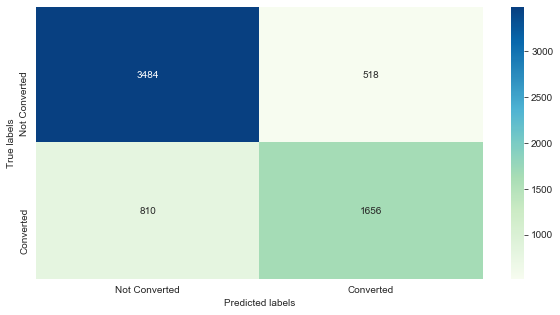

In [89]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()
    
#Plotting the Confusion Matrix\
draw_cm( y_train_pred_final['Converted'], y_train_pred_final['Predicted'], "GnBu")

In [90]:
#Let's evaluate the other metrics as well
TP = confusion[1,1] #True Positive
TN = confusion[0,0] #True Negative
FP = confusion[0,1] #False Positive
FN = confusion[1,0] #False Negative

***Accuracy = (TP + TN)/(TP + TN + FP + FN)
<br>Sensitivity = TP/(TP + FN)
<br>Specificity = TN/(TN + FP)
<br>Precision = TP/(TP + FP)
<br>Recall = TP/(TP + FN)
<br>F Measure (F1) = 2 * ((Precision * Recall)/(Precision + Recall))***


### *Accuracy*

In [91]:
#Let's check the overall accuracy
#Accuracy - fraction of correct predictions among all predictions
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.7946815089672232


-  TPR (True Positive Rate) = TP/(TP + FN)
-  TNR (True Negative Rate) = TN/(TN + FP)
-  FPR (False Positive Rate) = FP/(TN + FP)
-  FNR (False Negative Rate) = FN/(TP + FN)

### *Sensitivity/True Positive Rate*

In [92]:
# Calculate the sensitivity(proportion of 'Converted' that are correctly predicted)
TP/(TP+FN)

0.6715328467153284

### *Specificity/True Negative Rate*

In [93]:
# Calculate the specificity(proportion of 'Not Converted' that are correctly predicted)
TN/(TN+FP)

0.8705647176411794

## *Finding the Optimal Cutoff*

***We have earlier choosen the cutoff at 0.5 which was arbitrary to check the model performance. But, to get good result, we need to optimise the threshold.First we need to plot the ROC curve to chech the AUC(Area Under the Curve).***

### *ROC Curve :*

***A ROC Curve demonstrates several things:<br>1.It shows the tradeoff between sensitivity and specitivity(any increase in sensitivity will be accompanied by a decrease in specitivity).<br>2.The closure the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.<br>3.The closure the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test(random model).<br>4.The larger the Area Under Curve(AUC), the better the model is.***

In [94]:
#ROC function
def draw_roc(actual,probs):
    fpr,tpr,thresholds = metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [95]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob,drop_intermediate=False)

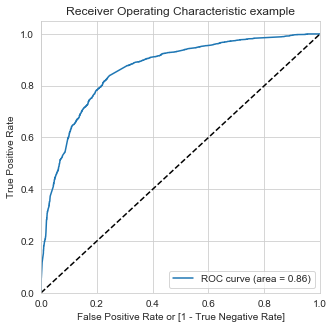

In [96]:
#Plot the ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

***The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model. Let's check the sensitivity and specificity tradeoff to find the optimal cutoff point.***

In [97]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head() 

,Converted,Converted_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.270937,0,1,1,1,0,0,0,0,0,0,0
1,0,0.256296,0,1,1,1,0,0,0,0,0,0,0
2,0,0.316873,0,1,1,1,1,0,0,0,0,0,0
3,0,0.868134,1,1,1,1,1,1,1,1,1,1,0
4,0,0.150628,0,1,1,0,0,0,0,0,0,0,0


In [98]:
#Let's create a dataframe to see the values of accuracy,sensitivity and specificity at different values of probability cutoffs
cutoff_df = pd.DataFrame(columns=['probability','accuracy','sensitivity','specificity'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
print(cutoff_df) 

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.381262     1.000000     0.000000
0.1          0.1  0.566017     0.972830     0.315342
0.2          0.2  0.727891     0.904704     0.618941
0.3          0.3  0.788806     0.820762     0.769115
0.4          0.4  0.794063     0.751825     0.820090
0.5          0.5  0.794682     0.671533     0.870565
0.6          0.6  0.786487     0.594485     0.904798
0.7          0.7  0.760049     0.462287     0.943528
0.8          0.8  0.731293     0.342660     0.970765
0.9          0.9  0.685529     0.194647     0.988006


<Figure size 1296x576 with 0 Axes>

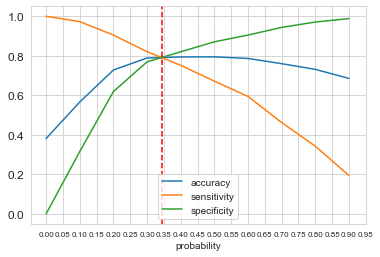

In [99]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.345, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

***The optimal cutoff is seems to be around 0.345. Let's predict our model with this cutoff.***

In [100]:
y_train_pred_final['predicted_ROC'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.345 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,predicted_ROC
0,0,0.270937,0,0
1,0,0.256296,0,0
2,0,0.316873,0,0
3,0,0.868134,1,1
4,0,0.150628,0,0


In [101]:
#Let's create the confusion matrix once again
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted_ROC)
print(confusion1)

[[3151  851]
 [ 507 1959]]


##### Accuracy 

In [102]:
#Check the accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted_ROC)

0.79004329004329

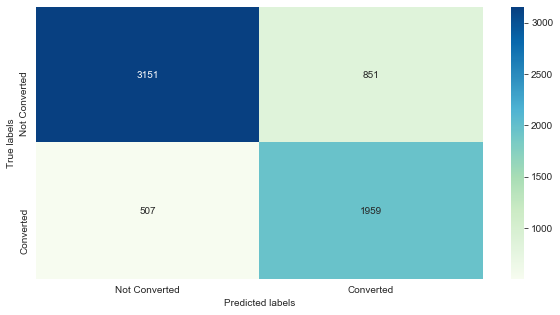

In [103]:
#Plotting the Confusion Matrix\
draw_cm( y_train_pred_final['Converted'], y_train_pred_final['predicted_ROC'], "GnBu")

In [104]:
#Let's evaluate the other metrics as well
TP = confusion1[1,1] #True Positive
TN = confusion1[0,0] #True Negative
FP = confusion1[0,1] #False Positive
FN = confusion1[1,0] #False Negative

#### *Sensitivity/True Positive Rate*

In [105]:
# Calculate the sensitivity
TP/(TP+FN)

0.7944038929440389

#### *Specificity/True Negative Rate*

In [106]:
# Calculate the specificity
TN/(TN+FP)

0.7873563218390804

### *Precision and Recall Tradeoff*

***Precision means out of all leads which are predicted at 1, how many have truly converted.***
***Recall means out of all leads that have converted, how many of them were correctly identifies as 1. This is the same value as sensitivity.***

***Precision-Recall trade-off point is used to decide the cut-off point especially when there is huge imbalance in data. In our case the data distribution is 62% vs 38%. So imbalance of data is not a big factor.***

#### *Precision*

In [107]:
#Precision=TP/(TP+FP)
confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])

0.697153024911032

#### *Recall*

In [108]:
#Recall=TP/(FN+TP)
confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])

0.7944038929440389

In [109]:
y_train_pred_final.Converted,y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    0
 6464    1
 6465    0
 6466    0
 6467    0
 Name: Predicted, Length: 6468, dtype: int64)

In [110]:
p,r,thresholds = precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_Prob)

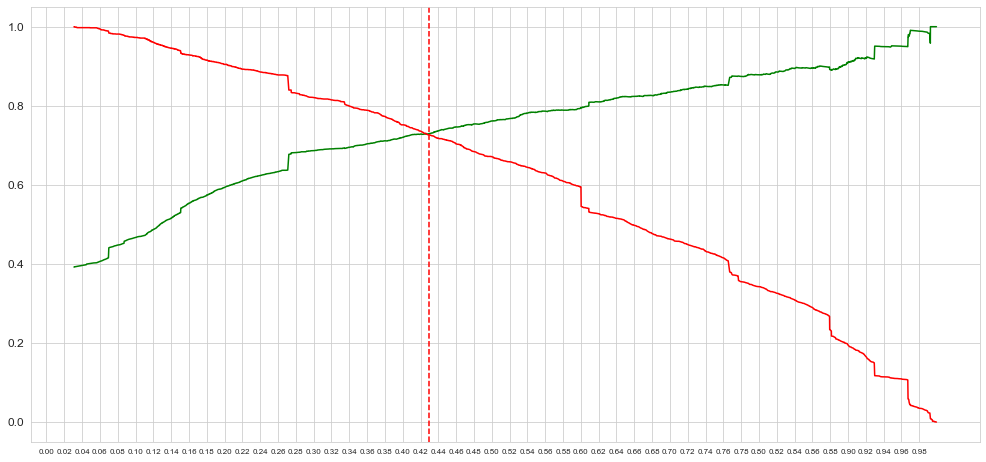

In [111]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(17,8))
sns.set_style("whitegrid")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.axvline(x=0.429, color='r', linestyle='--') # additing axline
plt.yticks(size=12)

plt.show()

***Based on Precision- Recall Trade off curve, the cutoff point seems to 0.429***

In [112]:
y_train_pred_final['predicted_PRT'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x>0.429 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Predicted,predicted_ROC,predicted_PRT
0,0,0.270937,0,0,0
1,0,0.256296,0,0,0
2,0,0.316873,0,0,0
3,0,0.868134,1,1,1
4,0,0.150628,0,0,0


#### *Accuracy*

In [113]:
#Let's check the accuracy now
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted_PRT)

0.7931354359925789

In [114]:
#Let's create the confusion matrix once again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted_PRT)
print(confusion2)

[[3338  664]
 [ 674 1792]]


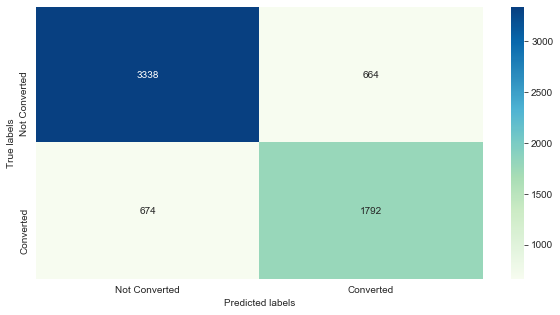

In [115]:
# Function for Confusion Matrix :
def draw_cm( actual, predicted, cmap ): 
    cm = metrics.confusion_matrix( actual, predicted, [0,1] )
    plt.figure(figsize=(10,5))
    sns.heatmap(cm, annot=True, fmt='.0f', cmap=cmap,
    xticklabels = ["Not Converted", "Converted"] ,
    yticklabels = ["Not Converted", "Converted"] ) 
    plt.ylabel('True labels')
    plt.xlabel('Predicted labels') 
    plt.show()
    
#Plotting the Confusion Matrix\
draw_cm( y_train_pred_final['Converted'], y_train_pred_final['predicted_PRT'], "GnBu")

In [116]:
#Let's evaluate the other metrics as well
TP = confusion2[1,1] #True Positive
TN = confusion2[0,0] #True Negative
FP = confusion2[0,1] #False Positive
FN = confusion2[1,0] #False Negative

#### *Precision*

In [117]:
#Calculate Precision
TP/(TP+FP)

0.7296416938110749

#### *Recall*

In [118]:
# Calculate Recall
TP/(TP+FN)

0.7266828872668288

#### *Sensitivity/True Positive Rate*

In [119]:
# Calculate the sensitivity
TP/(TP+FN)

0.7266828872668288

#### *Specificity/True Negative Rate*

In [120]:
# Calculate the specificity
TN/(TN+FP)

0.8340829585207397

***By using the Precision - Recall trade off chart cut-off points, the model output has changed the following way :<br>-  True Positive number has decreased.<br>-  True Negative number has increased.<br><br>For our purpose CEO wants to identify the people correctly who will convert to leads. Thus, we cannot use Precision-Recall trade-off method as it reduced True Positive. We have to increase Sensitivity / Recall value to increase True Positives. We will use 0.345 as cutoff point which was obtained from ROC curve.***

In [121]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False).head()

,Converted,Converted_Prob,Predicted,predicted_ROC,predicted_PRT,lead_score_1
2888,1,0.999283,1,1,1,99
1273,1,0.998333,1,1,1,99
2111,1,0.997230,1,1,1,99
2709,1,0.997209,1,1,1,99
5631,1,0.996776,1,1,1,99


# *Model Evalution : Test Dataset*

In [122]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,...,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
4269,0,1.749143,1.013928,2.117849,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2376,0,-1.149699,-0.901052,-1.266675,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7766,0,0.662077,-0.789297,1.553761,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.901052,-1.266675,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4359,0,-1.149699,-0.901052,-1.266675,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [123]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_SMS Sent,Last Activity_Unsubscribed,Last Notable Activity_Email Bounced,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent
4269,0,1.013928,0,0,0,0,0,1,0,0,0,0,1
2376,0,-0.901052,0,1,0,0,0,1,0,0,0,0,1
7766,0,-0.789297,0,0,0,0,0,0,0,0,0,0,0
9199,0,-0.901052,1,0,0,1,0,0,0,0,1,0,0
4359,0,-0.901052,0,1,0,0,0,0,0,0,0,0,0


In [124]:
#adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unsubscribed', 'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [125]:
# Predicting the final test model 
y_test_pred = log_model8.predict(X_test_sm)

In [126]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.806361
2376    0.967123
7766    0.123419
9199    0.069587
4359    0.879278
9186    0.643837
1631    0.508695
8963    0.178971
8007    0.108690
5324    0.412589
dtype: float64

In [127]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.806361
2376,0.967123
7766,0.123419
9199,0.069587
4359,0.879278


In [128]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [129]:
# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,0
0,1,0.806361
1,1,0.967123
2,1,0.123419
3,0,0.069587
4,1,0.879278


In [130]:
#Rename the column
y_pred_final = y_pred_final.rename(columns={0:'Conversion_Probability'})

In [131]:
#Check y_pred_final
y_pred_final.head()

,Converted,Conversion_Probability
0,1,0.806361
1,1,0.967123
2,1,0.123419
3,0,0.069587
4,1,0.879278


***Strategy:
Now we will use Cutoff point of 0.345 from Sentivity - Specificity - Accuracy cut-off points***

In [132]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Converted,Conversion_Probability,final_predicted
0,1,0.806361,1
1,1,0.967123,1
2,1,0.123419,0
3,0,0.069587,0
4,1,0.879278,1


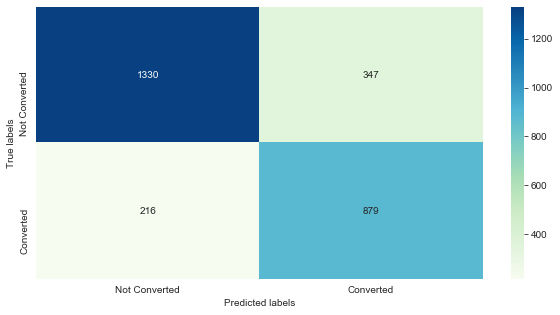

In [133]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted'], y_pred_final['final_predicted'], "GnBu")

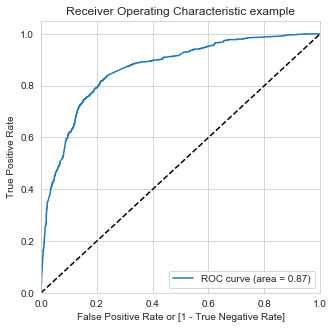

In [134]:
#Plot the ROC Curve
draw_roc(y_pred_final.Converted, y_pred_final.Conversion_Probability)

***Inferences:
ROC value of 0.87 shows the model is performing well in Test dataset.***

#### *Accuracy*

In [135]:
#Check the accuracy
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7968975468975469

#### *Sensitivity/True Positive Rate*

In [136]:
#Let's evaluate the other metrics as well
TP = confusion1[1,1] #True Positive
TN = confusion1[0,0] #True Negative
FP = confusion1[0,1] #False Positive
FN = confusion1[1,0] #False Negative

In [137]:
# Calculate the sensitivity
TP/(TP+FN)

0.7944038929440389

#### *Specificity/True Negative Rate*

In [138]:
# Calculate the specificity
TN/(TN+FP)

0.7873563218390804

In [139]:
#Assign lead score for the leads in Test Data Set :
y_pred_final['lead_score'] = (y_pred_final['Conversion_Probability']*100).astype('int64')
y_pred_final.sort_values(by='Conversion_Probability',ascending=False).head()

,Converted,Conversion_Probability,final_predicted,lead_score
603,1,0.998173,1,99
224,1,0.997504,1,99
2197,1,0.996727,1,99
2284,1,0.996322,1,99
2589,1,0.995664,1,99


In [140]:
# checking the data from top 
y_pred_final.head(5)

,Converted,Conversion_Probability,final_predicted,lead_score
0,1,0.806361,1,80
1,1,0.967123,1,96
2,1,0.123419,0,12
3,0,0.069587,0,6
4,1,0.879278,1,87


In [141]:
# checking the data from bottom 
y_pred_final.tail(5)

,Converted,Conversion_Probability,final_predicted,lead_score
2767,0,0.185832,0,18
2768,1,0.334500,0,33
2769,0,0.270937,0,27
2770,0,0.291604,0,29
2771,1,0.967123,1,96


***Insights:<br>-  We can use the lead_score column to identify the potential leads to prioritize first. <br>-  Higher the score, Higher the chances for the lead to convert.<br>-  If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value.<br>-  In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered.<br>-  As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.***

# *Conclusion:*

## *Features/Predictors that contribute to the prediction of our Model :*

In [142]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model8.params[0:]
final_parameters

const                                           -1.09
Do Not Email                                    -1.33
Total Time Spent on Website                      1.10
Lead Source_Olark Chat                           1.09
Lead Source_Reference                            4.07
Lead Source_Welingak Website                     5.50
Last Activity_Olark Chat Conversation           -0.86
Last Activity_Other Activity                     2.15
Last Activity_SMS Sent                           0.76
Last Activity_Unsubscribed                       1.03
Last Notable Activity_Email Bounced              0.32
Last Notable Activity_Modified                  -0.74
Last Notable Activity_Olark Chat Conversation   -0.50
Last Notable Activity_SMS Sent                   0.64
dtype: float64

In [143]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
top_predictors = final_parameters[1:]
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                                    -24.21
Total Time Spent on Website                      20.08
Lead Source_Olark Chat                           19.90
Lead Source_Reference                            74.02
Lead Source_Welingak Website                    100.00
Last Activity_Olark Chat Conversation           -15.70
Last Activity_Other Activity                     39.02
Last Activity_SMS Sent                           13.81
Last Activity_Unsubscribed                       18.66
Last Notable Activity_Email Bounced               5.88
Last Notable Activity_Modified                  -13.46
Last Notable Activity_Olark Chat Conversation    -9.04
Last Notable Activity_SMS Sent                   11.59
dtype: float64

<Figure size 864x576 with 0 Axes>

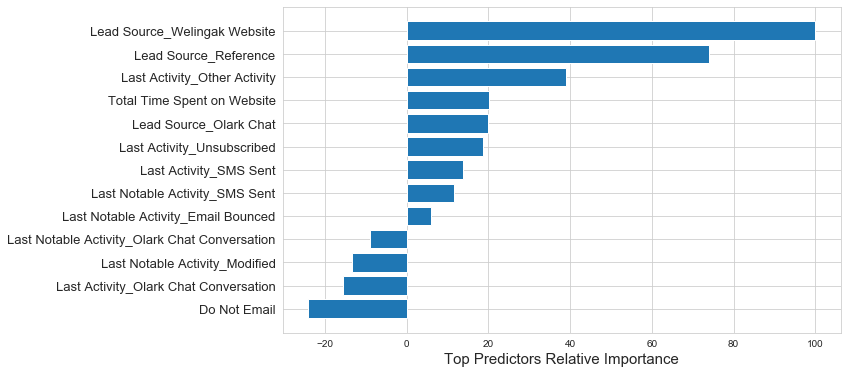

In [144]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')

fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

***1. The Top Three variables in our model which contribute most towards the probability of a lead getting converted are –***      
***
-  Lead Source_Welingak Website - The source of the lead is Welingak Website.  Around 98% of the leads have been converted whose source is Welingak Website.
     
-  Lead Source_Reference – The source of the lead is Reference.
    
-  Last Activity_Other Activity - Last activity performed by the customer is Other Activity. 
***

***2.  The Top Three categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion –***         

***
-  Lead Source_Olark Chat - The source of the lead is Olark Chat.
-  Total Time Spent on Website - The total time spent by the customer on the website. 
-  Last Activity_SMS Sent – Last activity performed by the customer is SMS Sent.
***

## *Model Summary:*

***A logistic regression model allows us to establish a relationship between a binary outcome variable and a group of predictor variables. It models the logit-transformed probability as a linear relationship with the predictor variables. More formally, let Y be the binary outcome variable indicating failure/success with {0,1} and p be the probability of y to be 1, p=P(Y=1). Let X1,⋯,Xn be a set of predictor variables. Then the logistic regression of Y on x1,⋯,xk estimates parameter values for β0,β1,⋯,βn via maximum likelihood method of the following equation:***

### <font color='red'>***logit(p)=log(p1−p)=β0 + β1*X1 + … + βn*Xn.***

### *The magnitude and sign of the coefficients loaded in the logit function:*

<font color='green'>***logit(p) = log(p/(1-p)) = (5.51 * Lead Source_Welingak Website) + (4.08 * Lead Source_Reference) + (1.84 * Last Activity_Other Activity) + (1.11 * Lead Source_Olark Chat) + (1.10 * Total Time Spent on Website) + (0.66 * Last Activity_SMS Sent) - (0.73 * Last Notable Activity_Email Opened) - (0.91 * Last Activity_Olark Chat Conversation) - (0.98 * Last Notable Activity_Page Visited on Website) - (1.21 * Last Notable Activity_Olark Chat Conversation) -(1.27 * Last Notable Activity_Email Link Clicked) - (1.34 * Do Not Email) -(1.45 * Last Notable Activity_Modified) - 0.34***

### *Predicting Probabilities:*

***We can make predictions from the estimates. We do this by computing the effects for all of the predictors for a particular scenario, adding them up, and applying a logistic transformation.***

***Consider the scenario of a lead who is currently unemployed, originated from lead add form, didn't choose any specialization and who was identified from Welingak website, Last activity of customer is SMS sent, and chatted on Olark Chat and who dint spent time on the website and last notable activity is Page visited on website and wanted to be contacted by E-mail.***

***Then we can calculate his conversion probability as -<br><br>
logit(p) = log(p/(1-p)) = (5.51 * 1) + (4.08 * 0) + (1.84 * 0) + (1.11 * 1) + (1.10 * 0) + (0.66 * 1) - (0.73 * 0) - (0.91 * 0) - (0.98 * 1) - (1.21 * 0) -(1.27 * 0) - (1.34 * 0) -(1.45 * 0) - 0.34 = 5.96***

***The logistic transformation is:<br><br>
Probability = 1 / (1 + exp(-x)) = 1/(1+exp(-5.96)) = 0.997 = 99.7% probability that the lead will get converted***